# Projet Finance 

### Introduction: Problématique métier

Nous sommes dans le secteur bancaire et plus précisément dans l’attribution de prêt a des clients d’une banque. Le but de ce projet est de prévoir si tel ou tel client est autorisé à contracter un prêt. 
En d’autres terme classer nos clients en deux groupes distincts :
    • Autorisé à contracter un prêt
    • Non-autorisé
Pour ce faire la banque possède un certain nombre d’information sur le comportement de ces clients ou leurs informations personnelles.

### Traduction Machine Learning

Au vu de la problématique métier on est dans le cas d’un problème supervisé de Machine Learning et plus précisément dans un cas de classification. 

Nous pouvons donc imaginer partir sur des modèles tel que des Decision Tree (Classifier), des random forest et autres Xgboost.

Les metrics pour évaluer nos modèles sont dans ce cas l’accuracy, le recall ou encore la précision. 

<font color="green">Il faut peut-être voir avec le client si il préfère privilégier le fait de n’omettre aucun client qui puisse théoriquement contracté un prêt (Au risque d’augmenter l’accession au crédit à des clients à risque).  Ou au contraire si il veut minimiser les clients à risque au détriment de clients potentiellement viable
</font> 

En fonction de cette réponse on privilégiera :
    • Le score de « Recall » dans le premier cas.
    • Le score de « Precision » dans le second cas. 
    • Autrement on peut-équilibrer cela grace au F1 score.

<font color= "green">Il pourrait être intéressant de savoir si la banque à un seuil de clients à risque qu’elle accepte de prendre  car cela pourrait nous permettre de fixer un seuil de recall / precision qui conviennent à ces attentes. </font>

## Importation library

In [173]:
# Librairie général de python pour des opération communes
import pandas as pd
import numpy as np
from pandasgui import show # Fonction permettant une visualisation approfondie 
#d'une dataframe pandas sur un interface graphique avancée.


#Librairie de visualisation principale
import seaborn as sns 
import matplotlib.pyplot as plt
import graphviz
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

## Sommaire

- [1 : Importation des données](#1)
- [2 : Compréhension des données](#2)

### <a id='1'><center><font color="INDIANRED">1) Importation des données</font></center></a>

Nous avons deux dataset "différents" stocké avec deux méthodes différentes examinons tout d'abords les différences entre ces deux fichier. 

### Comparaison des datasets

In [174]:
df_csv= pd.read_csv('train.csv')
df_xls=pd.read_excel('train.xlsx')

On visualise d'abords nos deux DF de manière supperficielle  pour voir si les deux correpondent.

In [175]:
df_csv

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [176]:
df_xls

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


On vérifie la liste de nos colonnes. 

In [177]:
print(df_csv.columns)
print(df_xls.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


On continue notre exploration en regardant le type et le nombre de valeurs réel de nos datasets

In [178]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [179]:
df_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Enfin on vérifie les grands indicateurs statistique de nos données numétiques. 

In [180]:
df_csv.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [181]:
df_xls.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Conclusion

Les deux datasets présente des carractéritiques similaire :
<ul><li>Même nombre de colonnes </li>
    <li>Même nombre de lignes</li>
    <li>Même nombre de valeurs manquante</li>
    <li>Indicateurs statistiques égaux</li>
On peut donc partir du postulat que nos datasets sont identiques nous ne travaillerons donc que sur le dataset en csv 

### <a id='2'><center><font color="INDIANRED">2) Compréhension des données</font></center></a>

### Compréhension des variable

In [182]:
df=df_csv

In [183]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Nous avons donc 13 colonnes dans ce dataset dont une target (Loan_Status):

<b>Variables Indépendante</b>
<ul><li> Loan_ID : Un ID représentant uniquement chaque clients (Type: String)</li>
    <li>Gender : Le genre de notre client (Type: String) </li>
    <li>Married: Booleen représentant si notre client est marié(e) ou non (Type: Bool) </li>
    <li>Dependents: nombre de personne à charge sur le client (Type: Integer) </li>
    <li> Education: Booleen représentant si la personne est diplomé ou non (Type: Bool) </li>
    <li>Self_Employed: Booleen représentant si la personne est auto entrepreuneur (Type: bool) </li>
    <li>ApplicantIncome: Les revenus du client (Type: Float) </li>
    <li>CoapplicantIncome: Les revenus d'une personne associé au client (Mari / femme, parents...) (Type: Float)</li>
    <li>LoanAmount: Montant de l'emprunt (En centaine) (Type: Float)</li>
    <li>Loan_Amount_Term: Montant des remboursement par mois(Type: Float) </li>
    <li>Credit_History: existe-il des antécédants de crédit.(Type: Bool)</li>
    <li>Property_Area: La zone de l'habitation. (Type: String) </li></ul>

<b>Notre Target</b>

<ul><li>Loan_Status: Représente si un crédit est accordé ou non en fonction des autres variables indépendantes</li></ul>

### Visualisation univarié

Voyons les répartition de nos différents groupe

In [186]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Variable quantitative

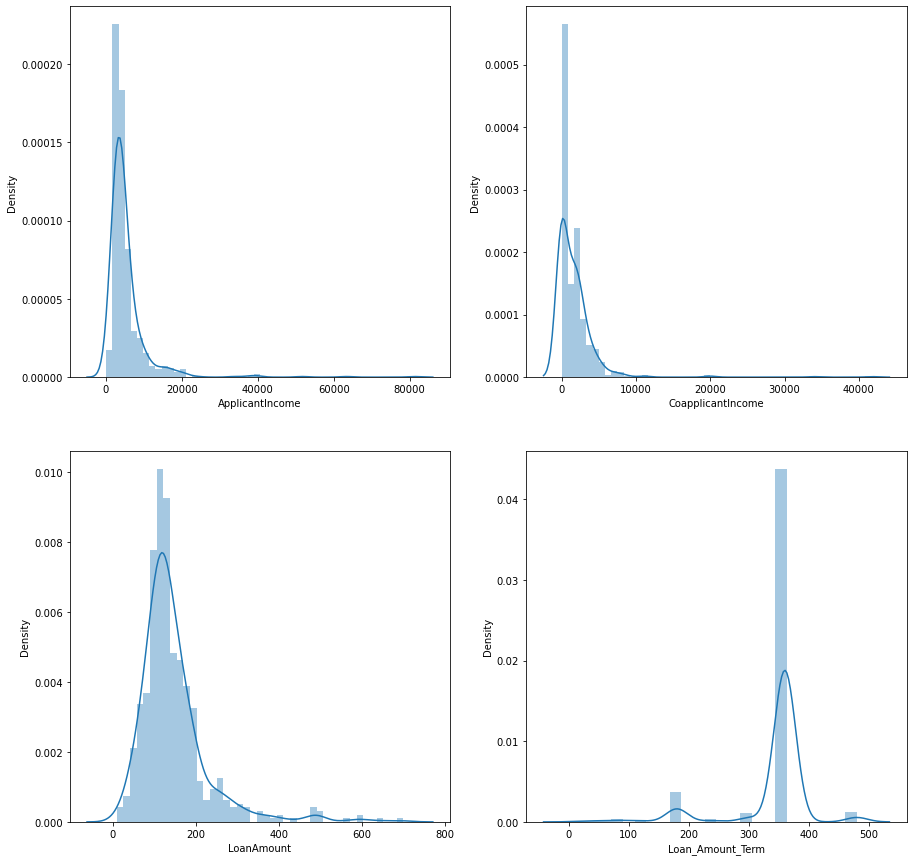

In [187]:
num_feature=[6,7,8,9] #Les indexs des variables numétiques. 
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,15))#On fixe notre subplot
for x, ax in zip(num_feature, axes.flat): #On passe en revue toute nos colonnes 
    sns.distplot(df.iloc[:,x],ax=ax) #On affiche des distplot pour chacune des variable numérique. 
plt.show()

Avec ces graphique on repére une grosse tendance concernant les mensualité et l'income. Celà ce reflète par un gros pic de densité. Le LoanAmount est plus étendue avec un pic à 180 a peu près. Pour le CoapplicantIncome la forte présence de 0 (C'est à dire l'absence de revenu secondaire), nuit grandement à la lisibilité du graphique. A noter également que pour l'instant on ne peut pas visualiser les données concernant les Dependants a cause de la présence de +3

### Variable qualitatif

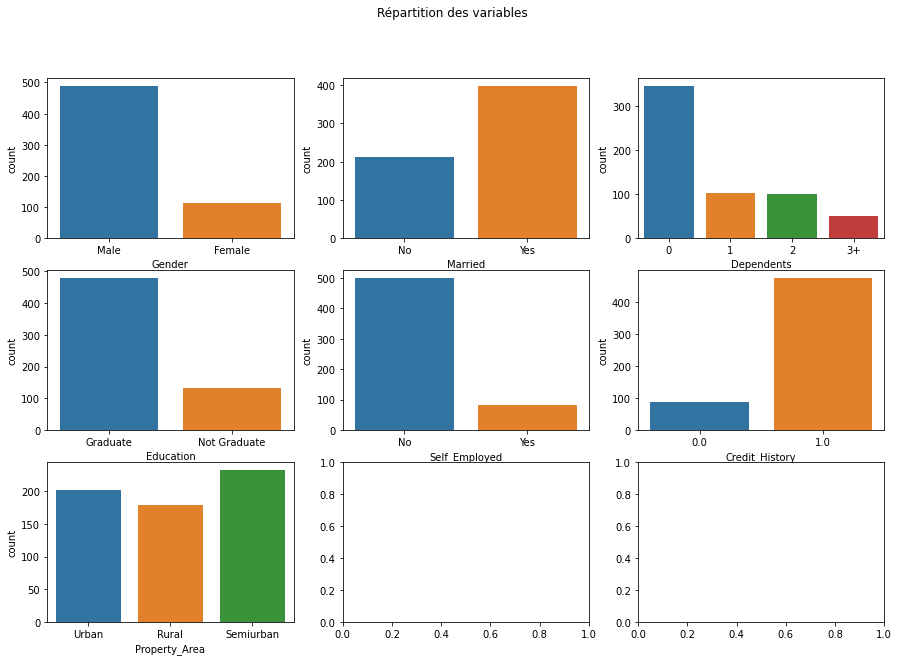

In [188]:
cat_feature=[1,2,3,4,5,10,11] # Les indexs de nos variable qualitatif (Hors Target)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15,10)) # Même principe que pour la boucle précédente mais avec un countplot
plt.suptitle('Répartition des variables')
for x, ax in zip(cat_feature, axes.flat):
    sns.countplot(df.iloc[:,x],ax=ax)
plt.show()

Ici on a une visualisation de nos données catégorical et la répartition de nos données dans ces catégories. On a pas de belle parité dans nos données mais étant donné qu'il ne s'agit pas de notre target ce n'est pas important d'équilibré ces variables.  

### Target

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

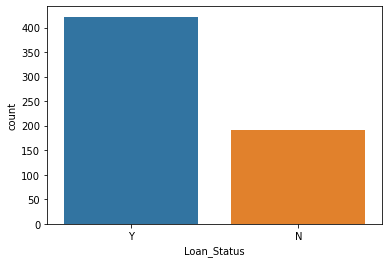

In [189]:
#Visualisation de notre target.
sns.countplot(df.Loan_Status)

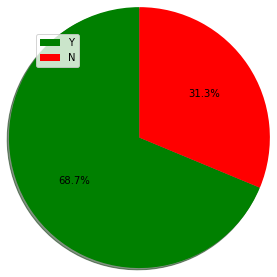

In [190]:
#Représentation en pie plot pour avoir une vue des proportions en %.

plt.pie(x=df['Loan_Status'].value_counts(), autopct="%1.1f%%", shadow=True,
        startangle=90, radius=1.5, colors = ['Green', 'Red'])
plt.legend(labels=df['Loan_Status'])
plt.show()

Ici on remarque un petit déséquilibre dans nos targets qu'il faudra peut-être palier ce n'est pas forcément obligatoire avec 30%

## Visualisation valeurs manquantes

<AxesSubplot:>

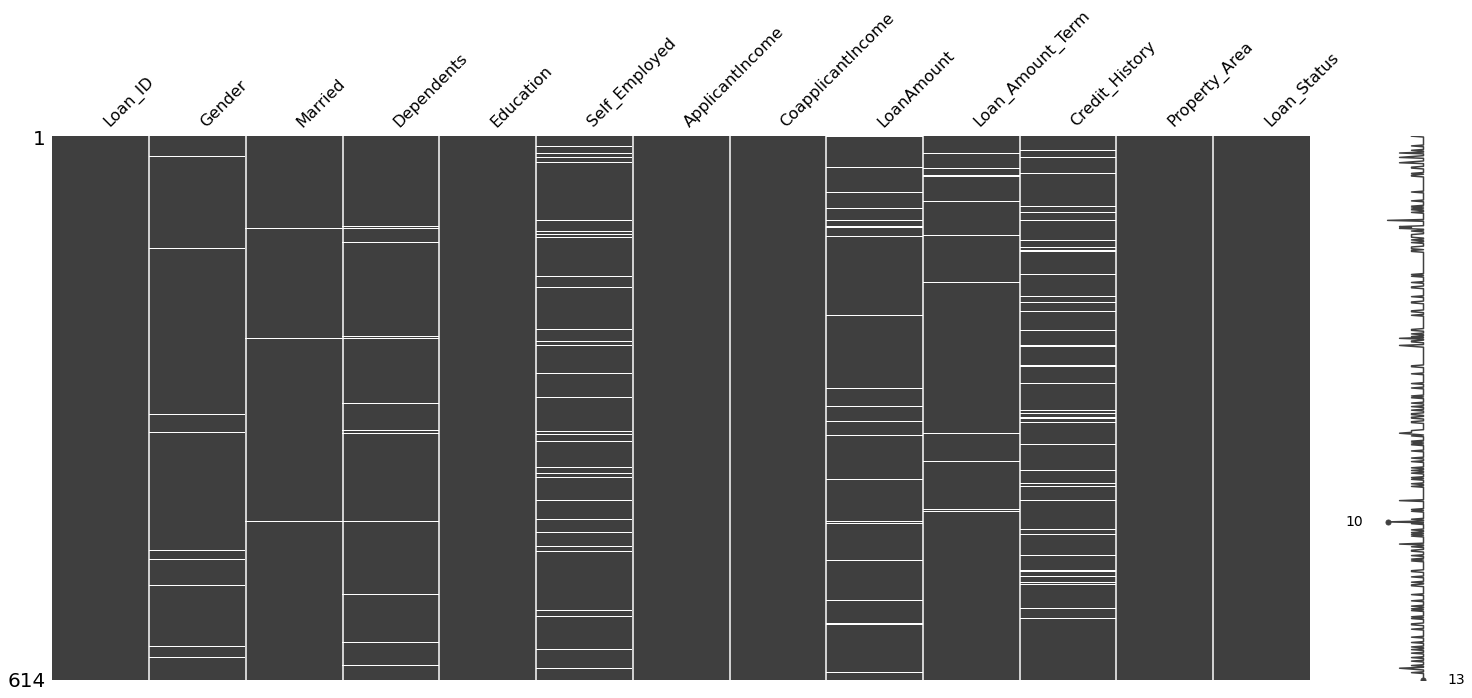

In [191]:
msno.matrix(df)
#Représente visuelement les valeurs manquante en blanc.

In [192]:
# Le nombre de valeurs null par colonne. 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [193]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<AxesSubplot:>

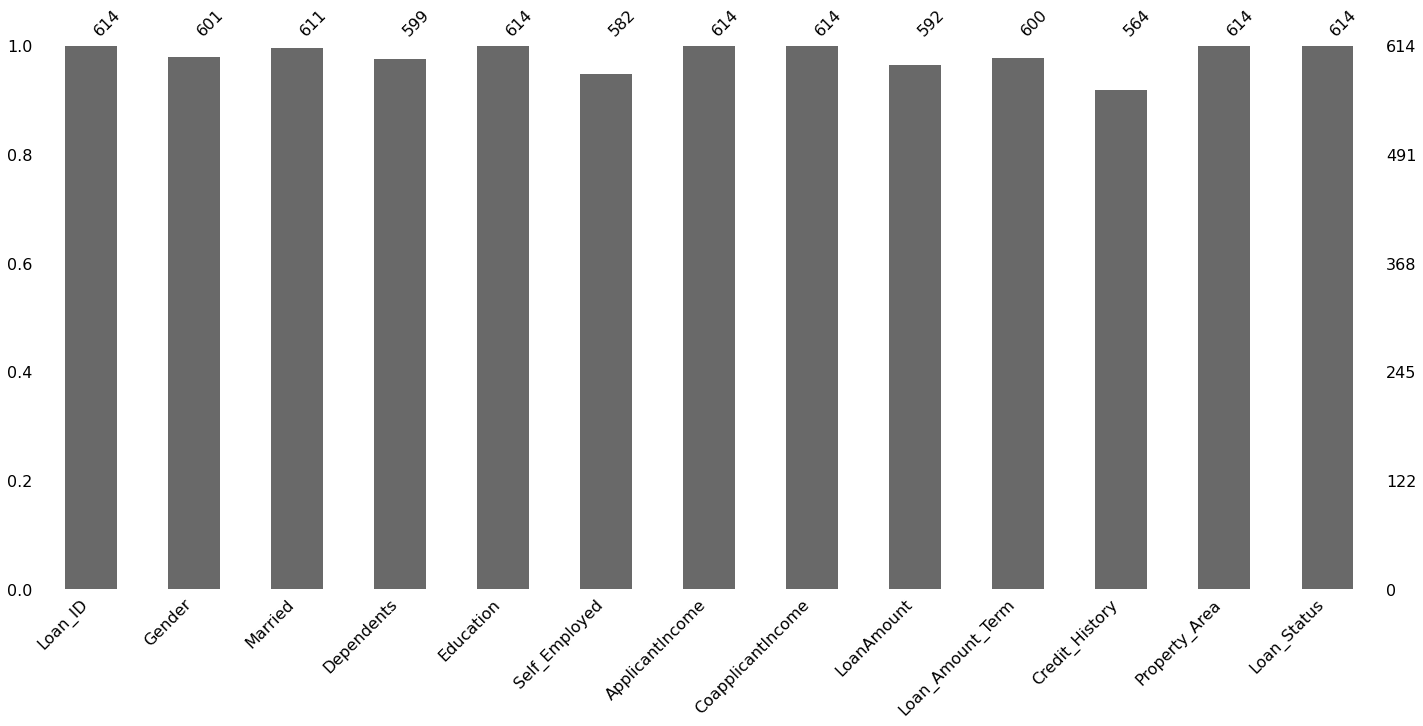

In [194]:
msno.bar(df)

Cette représentation représente le nombre de valeur non-null dans le dataset.

<AxesSubplot:>

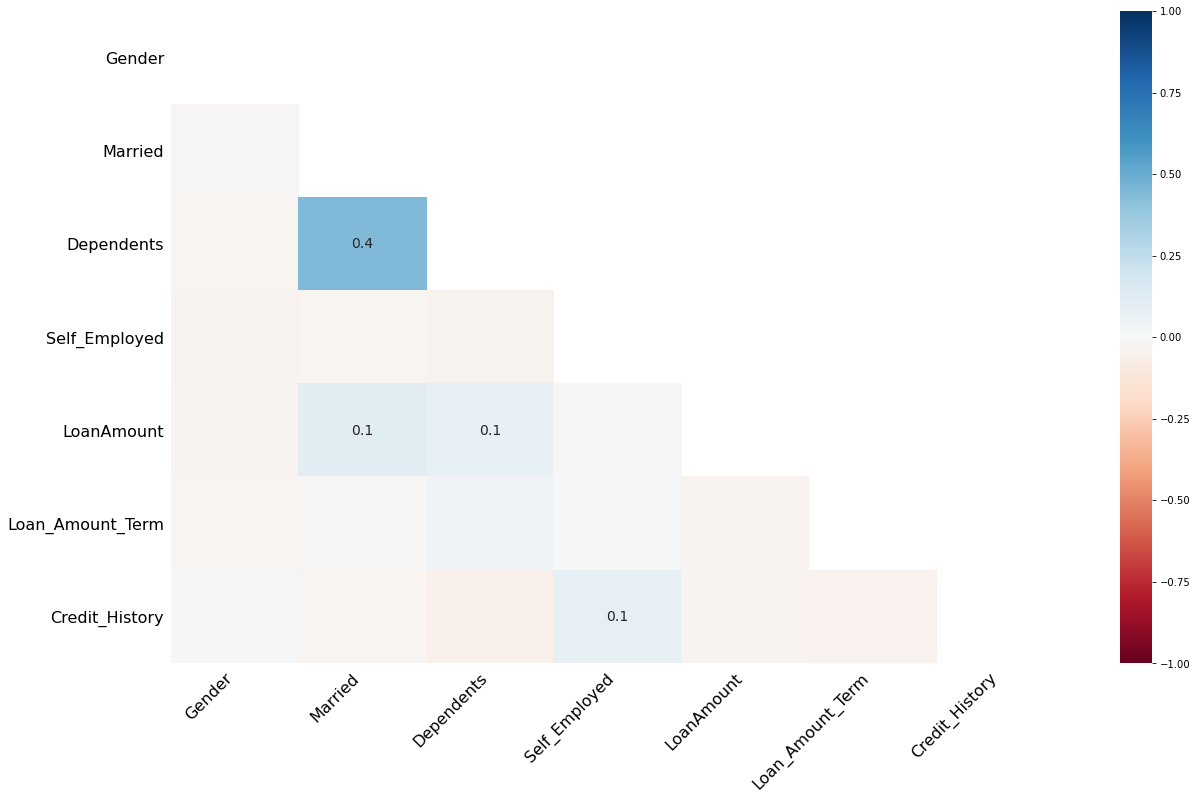

In [195]:
msno.heatmap(df)

Cette visualisation peut être intéressessante mais j'ai encore du mal à l'analyser. Il est censé représenté le liens entre l'absence de variable. 

1 représente que la présence d'une variable implique la présence d'une variable.
-1 représente que la présence d'une variable implique l'absence de l'autre variable. 

#### Conclusion
Nous avons donc 7 colonnes avec des valeurs null à traiter avant de poursuivre: 
<ul><li>Gender</li>
    <li>Married</li>
    <li>Dependants</li>
    <li>Self_Employed</li>
    <li>Loan_amount</li>
    <li>Loan_amount_term</li>
    <li>Credit History</li>

### <a id='3'><center><font color="INDIANRED">3) Nettoyage des données</font></center></a>

## Gestion des Valeurs Manquante

Maintenant il va nous falloir élaborer des stratégies pour enlever ces NaN. Chaque variable aura un traitement particulier pour garder un maximum la précision de nos données.   

In [201]:
df_cln0= df.copy()
df_cln0.isnull().sum()
#On créer un nouveau df pour travailler (Etant donné que l'on va changé beaucoup de chose à partir de là).
#On itérera cette variable (df_cln1, dfcln2...) a chaque changement. 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Variable Qualitatif

#### Gender
Ici il y a deux possibilités : Male or Female. 
Difficile de prédire cette valeurs en fonction des autres variable car cette variable est théoriquement indépendante. Je vais donc remplacer par une valeur fixe qui aura pour effet d'équilibrer (Légérement) cette features.

<AxesSubplot:xlabel='Gender', ylabel='count'>

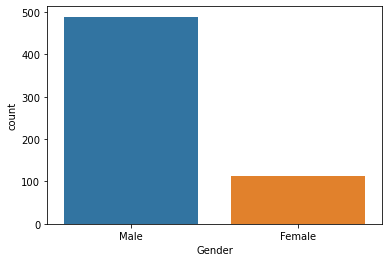

In [197]:
sns.countplot(df_cln0.Gender)

On va donc fixer (Arbitrairement nos valeurs manquante en Female).

In [206]:
df_cln1=df_cln0.copy()
df_cln1["Gender"]=df_cln1.Gender.fillna("Female")
#On rempli nos NaN avec une valeur fixe Female.

In [207]:
df_cln1.Gender.isnull().sum()

0

#### Married
Ici il est plus difficle de statuer car le fait d'être mariée peut renforcer l'aspect de stabilité d'un foyer auprès de l'organisme bancaire. Visualisons dans un premier temps. 

In [209]:
df_cln1.loc[df_cln1['Married'].isnull()]
#On remarque que l'ID 104 a un CoapplicantIncome non null on peut partir du postulat qu'il y a donc une seconde personne 
#Dans le foyer probablement un conjoint. 
#Pour les autres rien.
#On va donc remplacer la ligne 104 par Yes et les 228 et 435 par No

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [210]:
#
df_cln1.iloc[104,2]="Yes"
df_cln1.iloc[[228,435],2]="No"

In [211]:
df_cln1.Married.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Dépendents

   Le nombre de personne à charge n'est pas évident à deviner car il n'aura a priorie aucun impact direct sur les autres variables. Cependant on peut imaginer une corélation entre le fait d'être marrié et le fait d'avoir des enfants (Même si il existe des exceptions). 

<AxesSubplot:xlabel='Married', ylabel='count'>

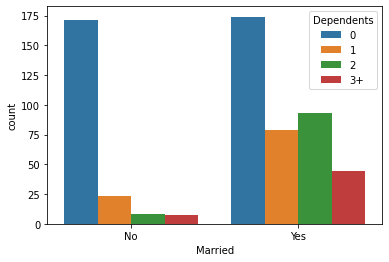

In [213]:
sns.countplot("Married",hue="Dependents", data=df_cln1)
#Effectivement, il y a une forte majorité de 0 personne à charge pour les célibataires. 

In [215]:
df_cln1.loc[df.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,No,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [216]:
df_cln2=df_cln1.copy()

In [217]:
#On modifie déjà nos célibataires avec un 0 en dépendents

In [228]:
df_cln2.Dependents.loc[((df_cln2.Dependents.isnull())&(df_cln2.Married == "No"))]="0"

In [232]:
df_cln2.loc[df_cln2.Dependents.isnull()]
#Il ne nous reste plus que des gens marrié avec un nombre indéterminté de Dependents


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
571,LP002847,Male,Yes,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

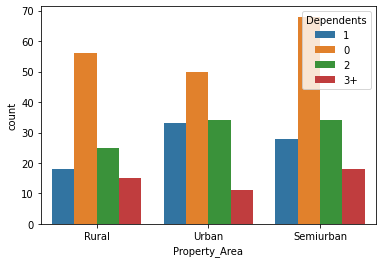

In [237]:
#Partons du postulats que les gens marrié vivant à la campagne sont plus enclin à faire des enfants.
sns.countplot(hue="Dependents", x="Property_Area", data=df_cln2.loc[df_cln2['Married']=="Yes"])
#C'est assez peu concluant.

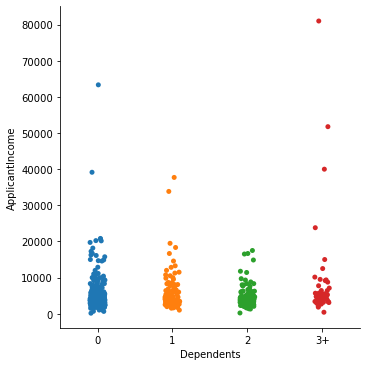

In [256]:
#Un haut revenu est un terreau propice pour des enfants.
sns.catplot(x="Dependents", y="ApplicantIncome", data=df_cln2)

(0.0, 15000.0)

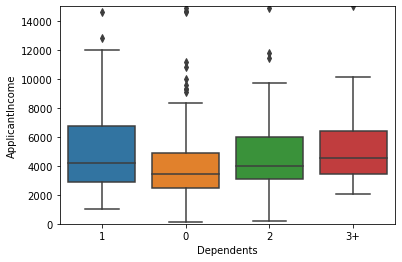

In [267]:
sns.boxplot(x="Dependents",y="ApplicantIncome", data=df_cln2.loc[df_cln2['Married']=="Yes"])
plt.ylim(0,15000)
#Passé 5000 applicantIncome il y a plus de chance d'avoir 1 Dependents. 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

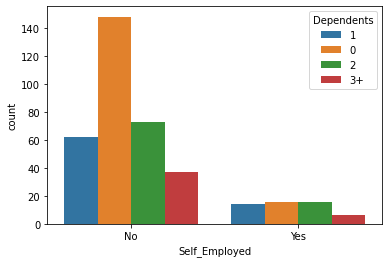

In [266]:
#Un dernier axe serait de vérifier le selfemployement

sns.countplot(hue="Dependents", x="Self_Employed", data=df_cln2.loc[df_cln2['Married']=="Yes"])

On a donc étudié 3 variables en liaison avec le nombre de Dependants nous pouvons poser quelques régle de subtistution. Le plus marquant reste l'income. 
<ul><li>Les clients avec un income supplémentaire de 5000 seront fixé avec un dependants 1</li>
    <li>En dessous de 5000 les clients veront leur dépendants fixé à 0</li>

In [268]:
df_cln2.Dependents.loc[((df_cln2.Dependents.isnull())&(df_cln2.ApplicantIncome >= 5000))]="1"
df_cln2.Dependents.loc[((df_cln2.Dependents.isnull())&(df_cln2.ApplicantIncome <= 5000))]="0"

In [269]:
df_cln2.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Self_Employed
Le status d'auto entrepreneur peut être un frein à l'obtention d'un crédit.
Une écrasante majorité des clients ne le sont pas.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

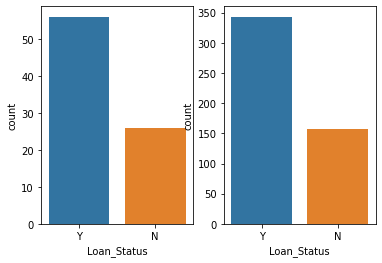

In [273]:

plt.subplot(1,2,1)
sns.countplot("Loan_Status", data=df_cln2.loc[df_cln2['Self_Employed']=="Yes"])

plt.subplot(1,2,2)
sns.countplot("Loan_Status", data=df_cln2.loc[df_cln2['Self_Employed']=="No"])


In [274]:
# Le graphique ci-dessus montre une certaine indépendance de cette variable.  

In [286]:
df_cln2.loc[df_cln2['Self_Employed']=="No"].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.00000,500.000000,482.000000,489.000000,463.000000
mean,5049.74800,1580.989840,141.748963,343.263804,0.835853
std,5682.89581,2438.161181,79.780919,64.696881,0.370809
min,150.00000,0.000000,9.000000,12.000000,0.000000
25%,2824.50000,0.000000,100.000000,360.000000,1.000000
50%,3705.50000,1293.500000,125.000000,360.000000,1.000000
75%,5292.75000,2303.000000,161.750000,360.000000,1.000000
max,81000.00000,33837.000000,700.000000,480.000000,1.000000


In [285]:
df_cln2.loc[df_cln2['Self_Employed']=="Yes"].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,82.000000,82.000000,79.00000,80.00000,75.000000
mean,7380.817073,1501.341463,172.00000,336.30000,0.840000
std,5883.564795,2780.713676,108.63465,69.39529,0.369075
min,674.000000,0.000000,25.00000,60.00000,0.000000
25%,3452.250000,0.000000,106.00000,360.00000,1.000000
50%,5809.000000,0.000000,150.00000,360.00000,1.000000
75%,9348.500000,2164.500000,189.00000,360.00000,1.000000
max,39147.000000,20000.000000,650.00000,480.00000,1.000000


In [280]:
#On remarque une moyenne d'income des Self_employed plus élevé que pour le client classique.
#Cependant le max des clients classique monte plus haut et le min descent plus bas

In [281]:
df_cln2.loc[df_cln2['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


On va partir de ce postulat: 
   <ul><li>Au delà de 4000 on va fixer notre client en Yes</li>
    <li>En dessous il sera en No</li></ul>

In [287]:
df_cln3=df_cln2.copy()

In [288]:
df_cln3.Self_Employed.loc[(df_cln3.Self_Employed.isnull())&(df_cln2.ApplicantIncome >= 4000)]="Yes"
df_cln3.Self_Employed.loc[(df_cln3.Self_Employed.isnull())&(df_cln2.ApplicantIncome <= 4000)]="No"

#### Credit History

Encore une fois il est difficile de deviner si un client a déjà eu un crédit. On peut imaginer que de très bas revenu n'y ont jamais eu accès

(0.0, 10000.0)

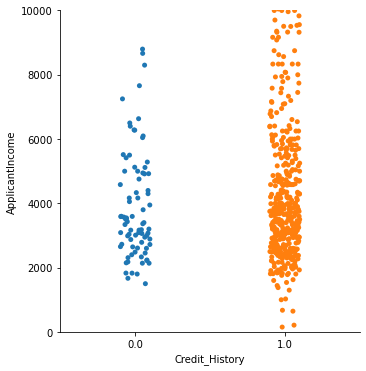

In [303]:
sns.catplot(y="ApplicantIncome", x="Credit_History", data=df_cln3)
plt.ylim(0,10000)

In [304]:
df_cln3.loc[df_cln3.Credit_History == 1].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,475.000000,475.000000,458.000000,467.000000,475.0
mean,5426.526316,1528.250358,144.786026,342.192719,1.0
std,5535.393384,2548.728908,83.051842,64.268660,0.0
min,150.000000,0.000000,9.000000,36.000000,1.0
25%,2908.500000,0.000000,100.000000,360.000000,1.0
50%,3859.000000,1040.000000,128.000000,360.000000,1.0
75%,5820.000000,2241.000000,168.000000,360.000000,1.0
max,63337.000000,33837.000000,700.000000,480.000000,1.0


In [305]:
df_cln3.loc[df_cln3.Credit_History == 0].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,89.000000,89.000000,85.000000,83.000000,89.0
mean,5679.438202,1542.179775,146.717647,341.927711,0.0
std,9301.896041,2023.914617,85.164772,66.744102,0.0
min,1500.000000,0.000000,45.000000,180.000000,0.0
25%,2787.000000,0.000000,104.000000,360.000000,0.0
50%,3547.000000,1330.000000,125.000000,360.000000,0.0
75%,5285.000000,2254.000000,160.000000,360.000000,0.0
max,81000.000000,11300.000000,600.000000,480.000000,0.0


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

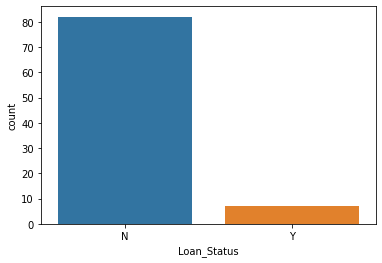

In [310]:
sns.countplot("Loan_Status", data=df_cln3.loc[df_cln3.Credit_History == 0])
#Une majorité écrasante de Credit_History  0 ce voient refusé un nouveau crédit.

On va donc partir sur ce postulat si Loan_Status est égale à N alors Credit_History est égale à 0 et vis versa

In [345]:
df_cln4=df_cln3.copy()

In [346]:
df_cln4.Credit_History.loc[(df_cln4.Credit_History.isnull())&(df_cln4.Loan_Status== "N")]= 0
df_cln4.Credit_History.loc[(df_cln4.Credit_History.isnull())&(df_cln4.Loan_Status== "Y")]= 1

In [347]:
df_cln4.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Variable quantitative

#### LoanAmount
Voyons déjà si il n'y aurait pas un lien entre nos deux variable lié au prêt.
On peut imaginer que les mensualité sont directement lié au montant total du prêt (Il nous manque cependant les mensualités.

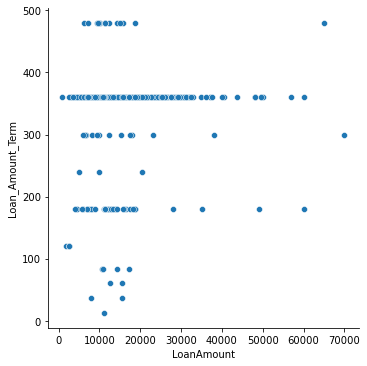

In [348]:
sns.relplot(x=df_cln4.LoanAmount*100, y="Loan_Amount_Term", data=df_cln4)

In [349]:
df_cln4.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [350]:
df_cln4.loc[df_cln4["LoanAmount"].isnull()]
#Nombre des Loan_Amount_Term sont égaux à 360

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,Yes,6782,0.0,NaN,360.0,0.0,Urban,N
102,LP001350,Male,Yes,1,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

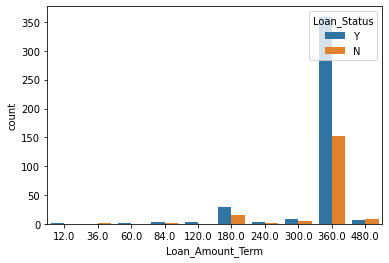

In [351]:
sns.countplot("Loan_Amount_Term",hue="Loan_Status",data=df_cln4)
#La donnée à 360 pour le Loan_Amount_Term est grandement majoritaire.

In [352]:
df_cln4.loc[(df_cln4.Loan_Amount_Term == 360) & (df_cln4.Loan_Status=="Y")].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,359.000000,359.000000,349.000000,359.0,359.000000
mean,5053.649025,1503.808134,142.593123,360.0,0.986072
std,4283.888488,1902.564141,73.065634,0.0,0.117354
min,210.000000,0.000000,26.000000,360.0,0.000000
25%,2816.000000,0.000000,101.000000,360.0,1.000000
50%,3750.000000,1387.000000,128.000000,360.0,1.000000
75%,5686.000000,2264.000000,161.000000,360.0,1.000000
max,39147.000000,20000.000000,600.000000,360.0,1.000000


In [354]:
df_cln4.loc[(df_cln4.Loan_Amount_Term == 360) & (df_cln4.Loan_Status=="N")].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,153.000000,153.000000,144.000000,153.0,153.000000
mean,5871.627451,1699.405229,158.520833,360.0,0.522876
std,7524.175897,3596.502011,90.835513,0.0,0.501117
min,150.000000,0.000000,9.000000,360.0,0.000000
25%,3036.000000,0.000000,104.000000,360.0,0.000000
50%,4166.000000,0.000000,133.500000,360.0,1.000000
75%,6080.000000,2210.000000,185.000000,360.0,1.000000
max,81000.000000,33837.000000,570.000000,360.0,1.000000


In [371]:
df_cln5=df_cln4.copy()

In [372]:
#Ici on remplace les valeurs Nan de ApplicantIncome par la mediane (Arrondie)
# des samples avec un Loan_Amount_Term égale à 360 et appartenant à la target N et Y
df_cln5.LoanAmount.loc[(df_cln5.LoanAmount.isnull()) & (df_cln5.Loan_Amount_Term == 360) & (df_cln4.Loan_Status=="Y")]= round(df_cln4.ApplicantIncome.loc[(df_cln5.Loan_Amount_Term == 360) & (df_cln5.Loan_Status=="Y")].median(),0)
df_cln5.LoanAmount.loc[(df_cln5.LoanAmount.isnull()) & (df_cln5.Loan_Amount_Term == 360) & (df_cln4.Loan_Status=="N")]= round(df_cln4.ApplicantIncome.loc[(df_cln5.Loan_Amount_Term == 360) & (df_cln5.Loan_Status=="N")].median(),0)

In [373]:
c= df_cln4.columns
c[0]
z= range(0,len(c)-1)

for x,z in zip(c,z):
    print(c[z],len(df_cln4[x].unique()))

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 204
Loan_Amount_Term 11
Credit_History 2
Property_Area 3


In [374]:
round(df_cln4.loc[(df_cln5.Loan_Amount_Term == 360) & (df_cln5.Loan_Status=="Y")].median(),0)

ApplicantIncome      3750.0
CoapplicantIncome    1387.0
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [380]:
df_cln5.loc[df_cln5.LoanAmount.isnull()]
#Faisons de même avec les 180 et 240 !

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
435,LP002393,Female,No,0,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [381]:
df_cln5.LoanAmount.loc[(df_cln5.LoanAmount.isnull()) & (df_cln5.Loan_Amount_Term == 240) & (df_cln5.Loan_Status=="Y")]= round(df_cln5.ApplicantIncome.loc[(df_cln5.Loan_Amount_Term == 240) & (df_cln5.Loan_Status=="Y")].median(),0)
df_cln5.LoanAmount.loc[(df_cln5.LoanAmount.isnull()) & (df_cln5.Loan_Amount_Term == 240) & (df_cln5.Loan_Status=="N")]= round(df_cln5.ApplicantIncome.loc[(df_cln5.Loan_Amount_Term == 240) & (df_cln5.Loan_Status=="N")].median(),0)

In [382]:
df_cln5.loc[df_cln5.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [383]:
df_cln5.LoanAmount.loc[(df_cln5.LoanAmount.isnull()) & (df_cln5.Loan_Amount_Term == 180) & (df_cln5.Loan_Status=="Y")]= round(df_cln5.ApplicantIncome.loc[(df_cln5.Loan_Amount_Term == 180) & (df_cln5.Loan_Status=="Y")].median(),0)
df_cln5.LoanAmount.loc[(df_cln5.LoanAmount.isnull()) & (df_cln5.Loan_Amount_Term == 180) & (df_cln5.Loan_Status=="N")]= round(df_cln5.ApplicantIncome.loc[(df_cln5.Loan_Amount_Term == 180) & (df_cln5.Loan_Status=="N")].median(),0)

In [384]:
df_cln5.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Loan_Amount_Term

On pourrait imaginer faire pareille quand dans le cas précédents cependant ici le LoanAmount a beaucoup plus de valeurs différentes. On va plutôt réfléchir à remplacer tout nos NaN par ce qui est a la fois le mode et la median de notre colonne Loan_Amount_Term soit 360

In [388]:
df_cln5.loc[df_cln5.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [387]:
df_cln5.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,614.000000
mean,5403.459283,1621.245798,279.400651,342.00000,0.833876
std,6109.041673,2926.248369,698.619746,65.12041,0.372495
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,175.000000,360.00000,1.000000
max,81000.000000,41667.000000,4166.000000,480.00000,1.000000


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

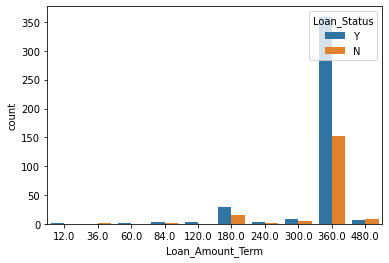

In [392]:
sns.countplot("Loan_Amount_Term", hue="Loan_Status", data=df_cln5)
#On peut vraiment voir l'écrasante domination du Loan_Amount_Term à 360

In [393]:
df_cln6=df_cln5.copy()

In [394]:
df_cln6.Loan_Amount_Term.loc[df_cln6.Loan_Amount_Term.isnull()]= 360

In [395]:
df_cln6.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Conclusion
Nos données sont maintenant totalement rempli avec nos nouvelles valeurs explorons maintenant les type de nos variables. 